<a href="https://colab.research.google.com/github/Izhan-07/Coursera_files/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

<IPython.core.display.Javascript object>


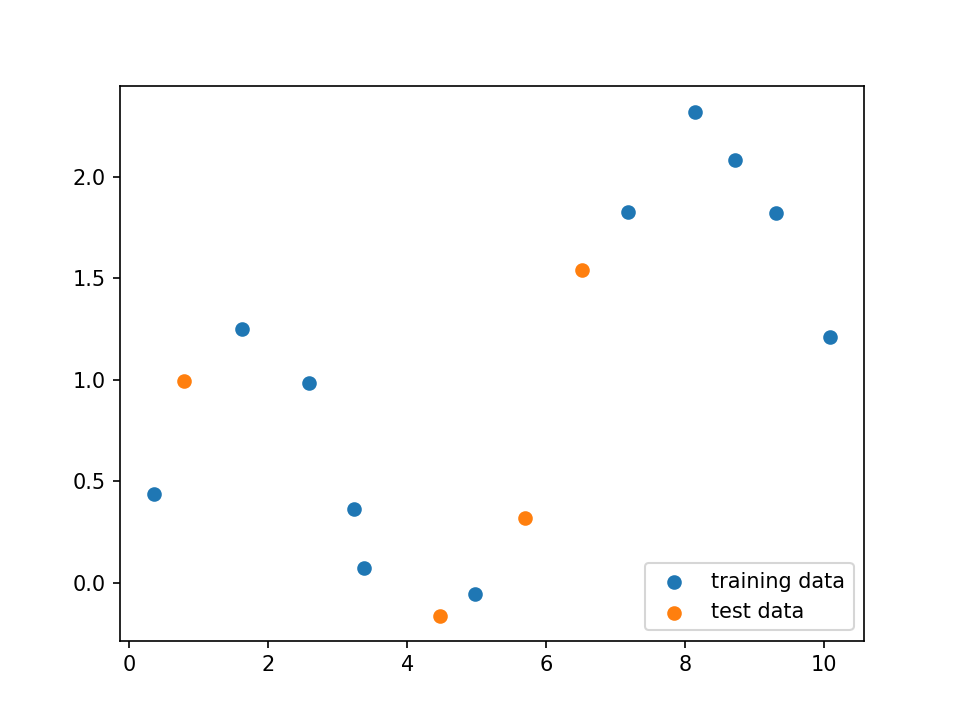

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():
    %matplotlib notebook

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="assets/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [ ]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    degree_predictions = np.zeros((4,100))
    # This np.zeros((4,100)) will produce a matrix array of 4 rows and 100 columns
    
    # i will be the counter variable 0,1,2,3
    # deg will be the degree 1,3,6,9
    for i, deg in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degree = deg)
        
        #X_train will contain approx 75% of X, so X contains np.linspace(0,10,15)
        # from there X_train will contain (15/100 * 75%) which is approx 11, so reshape to 11
        # Or we can use X_train.size instead of 11
        X_train_poly = poly.fit_transform(X_train.reshape(11,1))
        
        lr = LinearRegression()
        lr.fit(X_train_poly, y_train)
        
        X_new = np.linspace(0,10,100).reshape(100,1)
        y_pred = lr.predict(poly.fit_transform(X_new))
        
        degree_predictions[i,:] = y_pred
    return degree_predictions
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# this cell is not required in assignment
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

<IPython.core.display.Javascript object>


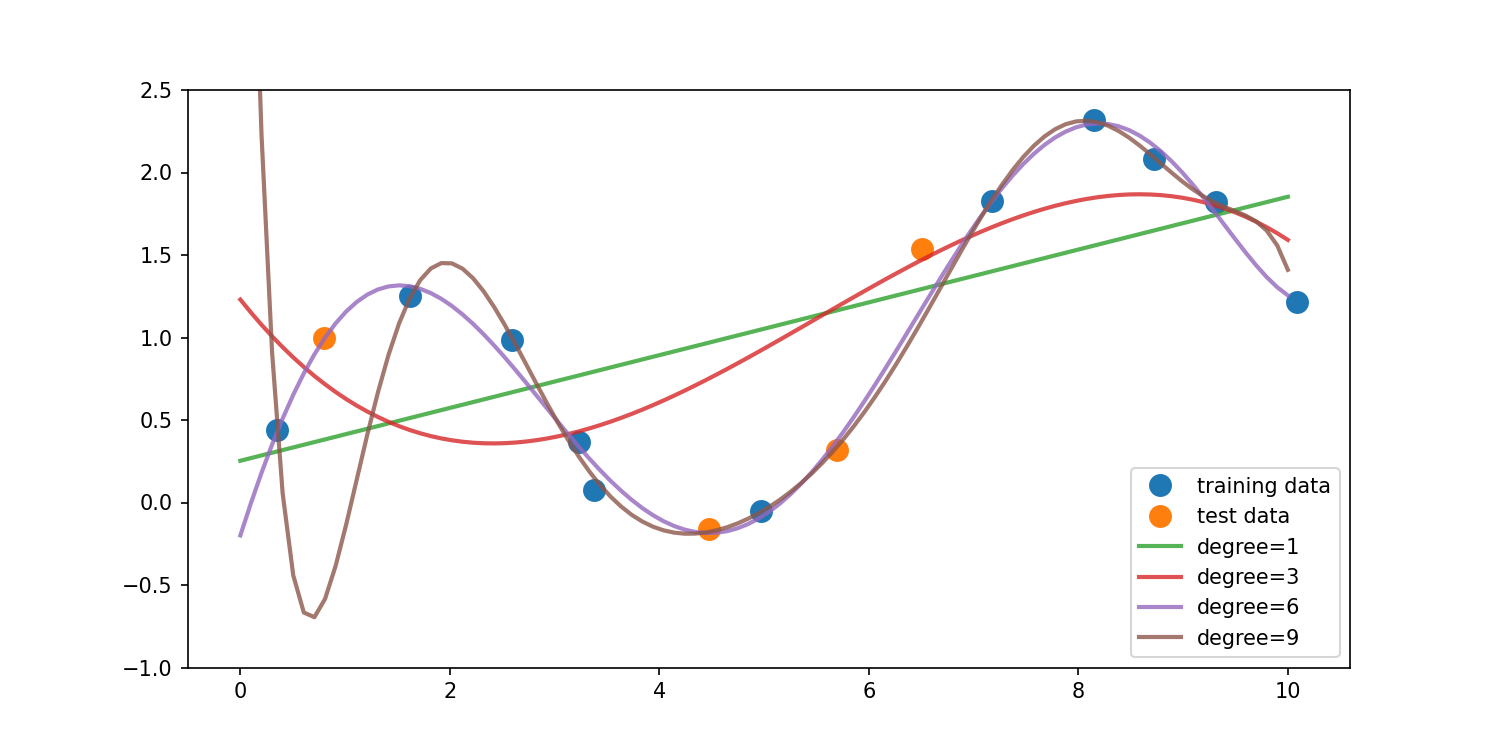

In [ ]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return a tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [ ]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    
    #np.zeros to fill empty zeros in r2_train and r2_test for initial initialization
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    
    for i in range(10):
        # Here i is 0,1,2...9
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(11,1))
        lr = LinearRegression()
        lr.fit(X_train_poly,y_train)
        r2_train[i] = lr.score(X_train_poly, y_train)
        
        # for test set we dont need to apply linear regression as we have
        #already trained the model with training set in lr
        X_test_poly = poly.fit_transform(X_test.reshape(4, 1))
        r2_test[i] = lr.score(X_test_poly, y_test)
        
    return (r2_train, r2_test)
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# this cell is not required in assignment
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247949, -0.64524599]))

<IPython.core.display.Javascript object>


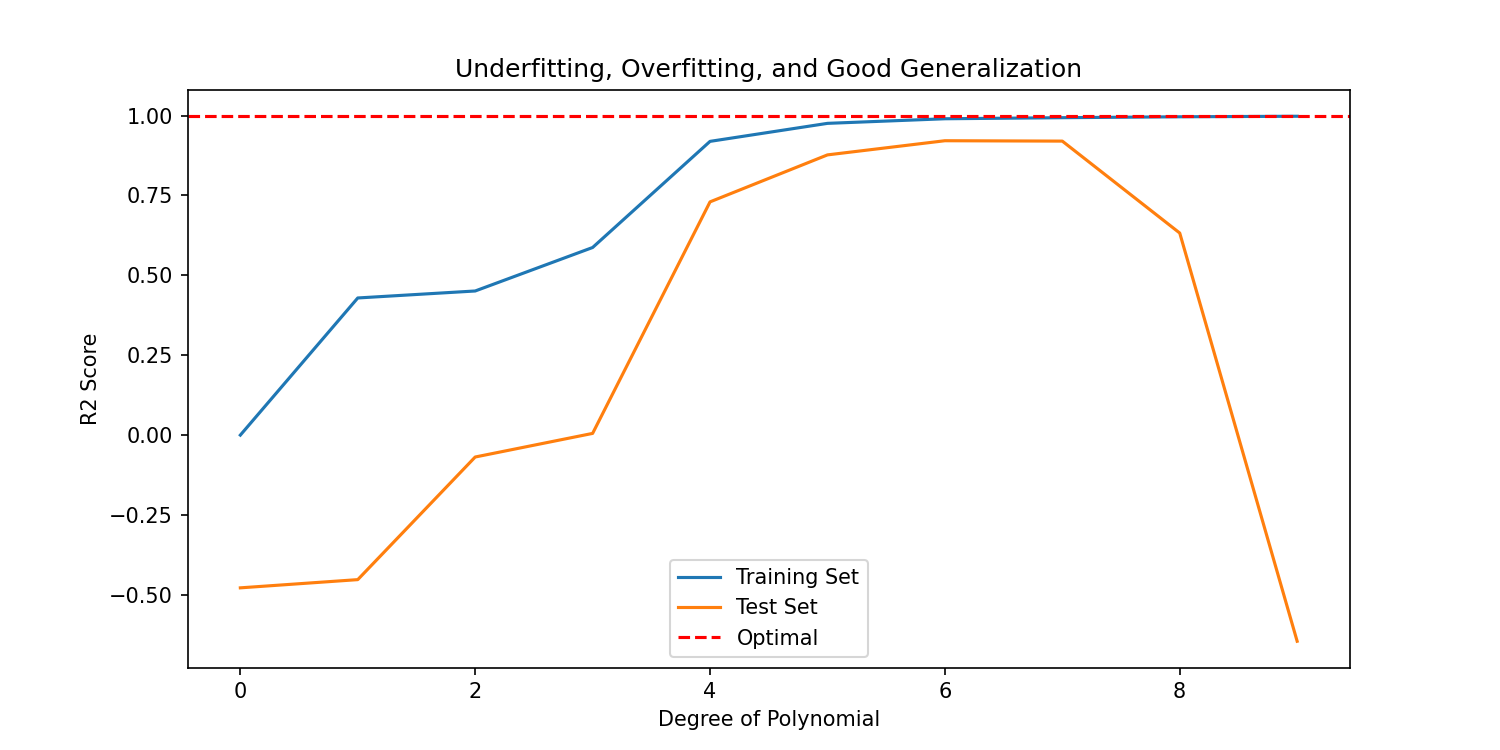

In [ ]:
# this cell is not required in assignment
# This cell is just to visualize

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
r2_train = np.zeros(10)
r2_test = np.zeros(10)
for i in range(10):
        # Here i is 0,1,2...9
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train.reshape(11,1))
        lr = LinearRegression()
        lr.fit(X_train_poly,y_train)
        r2_train[i] = lr.score(X_train_poly, y_train)

        # for test set we dont need to apply linear regression as we have
        #already trained the model with training set in lr
        X_test_poly = poly.fit_transform(X_test.reshape(4,1))
        r2_test[i] = lr.score(X_test_poly, y_test)
        
plt.figure(figsize=(10, 5))
plt.plot(range(10), r2_train, label='Training Set')
plt.plot(range(10), r2_test, label='Test Set')
plt.axhline(y=r2_score(y_train, lr.predict(X_train_poly)), color='r', linestyle='--', label='Optimal')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2 Score')
plt.title('Underfitting, Overfitting, and Good Generalization')
plt.legend()
plt.show()

In [ ]:
# The resulting plot shows that as the degree of the polynomial increases, the R2 score for the training set increases,
# but the R2 score for the test set first increases and then decreases. This is a typical pattern for a model that
# is underfitting, overfitting, or achieving good generalization performance.

# From the plot, we can see that a degree level of 0 corresponds to a model that is underfitting,
# because it has low R2 scores for both the training and test sets. A degree level of 9 corresponds to a model that is
# overfitting, because it has very high R2 score for the training set, but a lower R2 score for the test set.
# A degree level of 3 or 4 would provide a model with good generalization performance on this dataset,
# because it has a high R2 score for the test set and is close to the optimal R2 score for the training set.

# Therefore, the tuple with the degree values in this order is (0, 9, 3) or (0, 9, 4).

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [ ]:
def answer_three():
    # YOUR CODE HERE
    r2_train, r2_test = answer_two()
    
    # Underfitting will be the lowest value of training score
    underfitting = np.argmin(r2_train)

    # Overfitting will be the high R2 score for the training set, but a lower R2 score for the test set.
    overfitting = np.argmax(r2_train - r2_test)
    
    # Good Generaliztion will be high R2 score for the test set and is close to the optimal R2 score for the training set.
    good_generalization = np.argmax(r2_test)
    
    # YOUR CODE HERE
    return (underfitting,overfitting,good_generalization)
    raise NotImplementedError()

In [ ]:
# this cell is not required in assignment
answer_three()

(0, 9, 6)

### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`, `tol=0.1`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

*This function should return a tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [ ]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    
    # Create Polinomial Features
    poly = PolynomialFeatures(degree = 12)
    
    # Shape Polinomial Features
    X_train_poly = poly.fit_transform(X_train.reshape(11,1))
    X_test_poly = poly.fit_transform(X_test.reshape(4,1))
    
    # Linear Regression
    linreg = LinearRegression().fit(X_train_poly, y_train)
    LinearRegression_R2_test_score = linreg.score(X_test_poly, y_test)

    # Lasso Regression
    linlasso = Lasso(alpha=0.01, max_iter = 10000, tol=0.1).fit(X_train_poly, y_train)
    Lasso_R2_test_score = linlasso.score(X_test_poly, y_test)
    
    return (LinearRegression_R2_test_score, Lasso_R2_test_score)
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# this cell is not required in assignment
answer_four()

(-4.311981228294102, 0.6051396919570066)

## Part 2 - Classification

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

### Question 5

Using `X_train` and `y_train` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

*This function should return a list of length 5 of the feature names in descending order of importance.*

In [ ]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    # Train a decision tree classifier with default parameters and random state 0
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train2, y_train2)

    # Get the feature importances and sort them in descending order
    importances = tree.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Get the names of the 5 most important features
    features = X_train2.columns[indices][:5].tolist()

    # Return the list of feature names
    return features
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# this cell is not required in assignment
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` will use 3-fold cross validation (use `cv=3, n_jobs=2` as parameters for `validation_curve`), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [ ]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    # clf2 -> SVC Classifier 
    clf2 = SVC(kernel = 'rbf', C = 1, random_state=0)
    
    gammas = np.logspace(-4, 1, 6)
    train_scores, test_scores = validation_curve(clf2, X_mush, y_mush,param_name='gamma',param_range=gammas, cv=3, n_jobs=2)
    
    # Compute the mean score across the three cross-validation folds for each gamma value
    mean_train_scores = np.mean(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)

    # Return the two arrays of mean scores as a tuple
    return mean_train_scores, mean_test_scores
    raise NotImplementedError()

In [ ]:
# This cell is not required for the assignment
answer_six()

(array([0.89838749, 0.98104382, 0.99895372, 1.        , 1.        ,
        1.        ]),
 array([0.88749385, 0.82951748, 0.84170359, 0.86582964, 0.83616445,
        0.51797144]))

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the scores from question 6 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

<IPython.core.display.Javascript object>


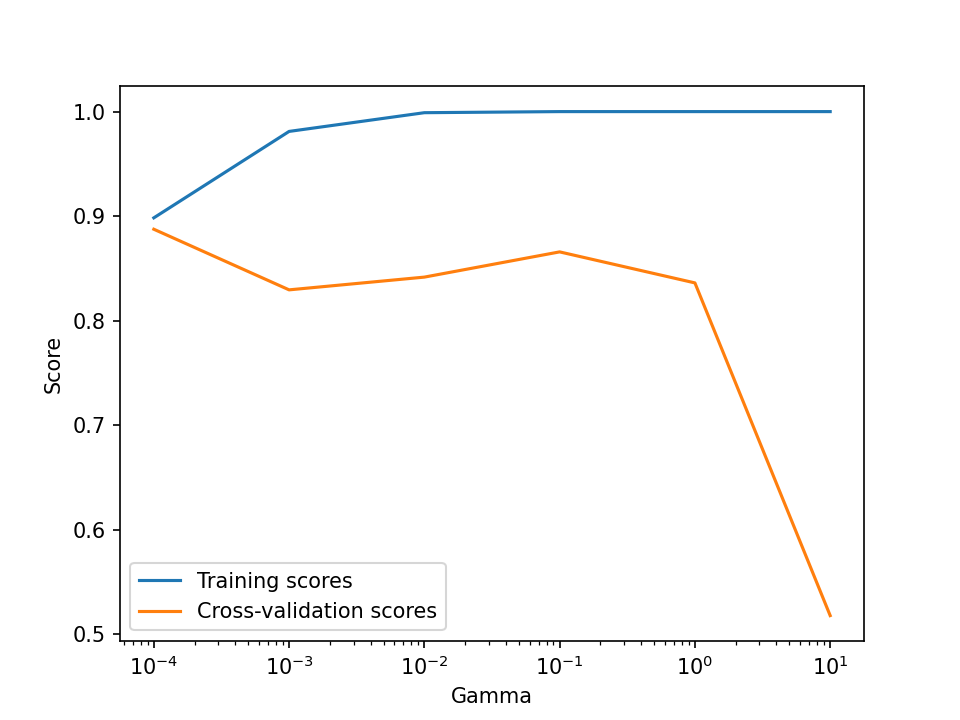

In [ ]:
# this cell is not required in assignment
# This cell is just to visualize
import matplotlib.pyplot as plt
train_scores, test_scores = answer_six()
param_range = np.logspace(-4, 1, 6)

plt.figure()
plt.semilogx(param_range, train_scores, label='Training scores')
plt.semilogx(param_range, test_scores, label='Cross-validation scores')
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [ ]:
def answer_seven():
    # YOUR CODE HERE
    #return (underfitting_gamma, overfitting_gamma, good_generalization_gamma)
    return (0.0001, 10, 0.1)
    raise NotImplementedError()